In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from tqdm import tqdm

In [111]:
raw_data_sheet = pd.read_csv('/Users/zane/Documents/MyDocuments/Plans/4-Horizon/Contagious_Behavior/bout_analysis/data/20170906_001.txt',sep='\t')[['Time','702 CH_1_P']]

In [127]:
power_data = raw_data_sheet['702 CH_1_P'].values[60*1000:600*1000]
upower_data,uind=np.unique(power_data,return_inverse=True)
power_count=np.bincount(uind)

auc = power_count.sum()

thresh = 0.618
percentage = 0
index = 0
while percentage < thresh:
    percentage += power_count[index]/auc
    index += 1
thresh_point = upower_data[index-1]
print('thresh:',upower_data[index-1])

thresh: 0.000438


In [128]:
noise_data = raw_data_sheet['702 CH_1_P'].values[7000*1000:8000*1000]
unoise_data,uind=np.unique(noise_data,return_inverse=True)
noise_count=np.bincount(uind)

noise_auc = noise_count.sum()

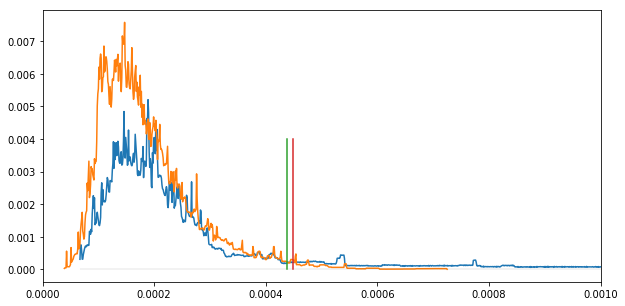

In [129]:
plt.figure(figsize=(10,5))
plt.plot(upower_data,power_count/auc)
plt.plot(unoise_data,noise_count/noise_auc)

plt.plot([upower_data[0],upower_data[-1]],[0,0],c='black',linewidth=0.1)
plt.plot([thresh_point,thresh_point],[0,0.004])
plt.plot([0.000449616734267,0.000449616734267],[0,0.004])

plt.xlim(0,0.001)
plt.show()
plt.close()

|Session| threshold | percentage| n|
| :--: | :--: |:--:|:--:|
|0906_001| 0.000449616734267| 0.666| 8|
|0906_003| 0.0248541996329| 0.99| 10|
|0907_001| 0.000217336669261| 0.55| 1| 
|0907_002| 0.000146221708007| 0.27| 3|